In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [86]:
# Charger le dataset
df = pd.read_csv("eco2mix/eco2mix_final.csv")

In [87]:
# Convertir la colonne 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'])

In [88]:
# Extraire des informations temporelles supplémentaires
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [89]:
# Encodage des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [90]:
# Encodage de la variable 'saison'
encoded_saison = encoder.fit_transform(df[['saison']])
encoded_saison_df = pd.DataFrame(encoded_saison, columns=encoder.get_feature_names_out(['saison']), index=df.index)

In [91]:
# Encodage de la variable 'Type de jour TEMPO'
encoded_temp = encoder.fit_transform(df[['Type de jour TEMPO']])
encoded_temp_df = pd.DataFrame(encoded_temp, columns=encoder.get_feature_names_out(['Type de jour TEMPO']), index=df.index)

In [92]:
# Ajouter les colonnes encodées au DataFrame
df = pd.concat([df, encoded_saison_df, encoded_temp_df], axis=1)

In [93]:
# Remplacer les variables booléennes en entiers (True = 1, False = 0)
df['weekend'] = df['weekend'].astype(int)
df['jour_ferie'] = df['jour_ferie'].astype(int)

In [96]:
# Vérifier la transformation
df

,Date,Consommation,tmin,tmax,weekend,jour_ferie,saison,Type de jour TEMPO,Year,Month,Day,Weekday,saison_Hiver,saison_Printemps,saison_Été,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
0,2018-01-01,56302.041667,6.501796,11.188690,0,1,Hiver,BLEU,2018,1,1,0,1.0,0.0,0.0,1.0,0.0
1,2018-01-02,63102.958333,6.229518,12.299398,0,0,Hiver,BLEU,2018,1,2,1,1.0,0.0,0.0,1.0,0.0
2,2018-01-03,63761.270833,8.244848,14.868485,0,0,Hiver,BLEU,2018,1,3,2,1.0,0.0,0.0,1.0,0.0
3,2018-01-04,63169.187500,9.100599,14.828743,0,0,Hiver,BLEU,2018,1,4,3,1.0,0.0,0.0,1.0,0.0
4,2018-01-05,62318.708333,7.344311,13.331548,0,0,Hiver,BLEU,2018,1,5,4,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-12-27,53530.250000,4.962500,11.850000,0,0,Hiver,BLEU,2022,12,27,1,1.0,0.0,0.0,1.0,0.0
1822,2022-12-28,53856.000000,6.247596,13.032212,0,0,Hiver,BLEU,2022,12,28,2,1.0,0.0,0.0,1.0,0.0
1823,2022-12-29,52290.770833,7.478846,12.827404,0,0,Hiver,BLEU,2022,12,29,3,1.0,0.0,0.0,1.0,0.0
1824,2022-12-30,52326.729167,7.039904,14.597596,0,0,Hiver,BLEU,2022,12,30,4,1.0,0.0,0.0,1.0,0.0


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Afficher les statistiques descriptives
print(df.describe())

                      Date  Consommation         tmin         tmax  \
count                 1826   1826.000000  1826.000000  1826.000000   
mean   2020-07-01 12:00:00  52741.101942     9.079733    17.952761   
min    2018-01-01 00:00:00  35618.708333    -7.050595     0.314970   
25%    2019-04-02 06:00:00  44810.333333     4.790737    12.366755   
50%    2020-07-01 12:00:00  49056.333333     8.814780    17.478250   
75%    2021-09-30 18:00:00  60988.796875    13.797649    23.566093   
max    2022-12-31 00:00:00  89600.083333    20.809290    35.869231   
std                    NaN  10678.184347     5.258206     6.937575   

           weekend   jour_ferie         Year        Month          Day  \
count  1826.000000  1826.000000  1826.000000  1826.000000  1826.000000   
mean      0.285323     0.030120  2020.000000     6.523549    15.727820   
min       0.000000     0.000000  2018.000000     1.000000     1.000000   
25%       0.000000     0.000000  2019.000000     4.000000     8.000000   

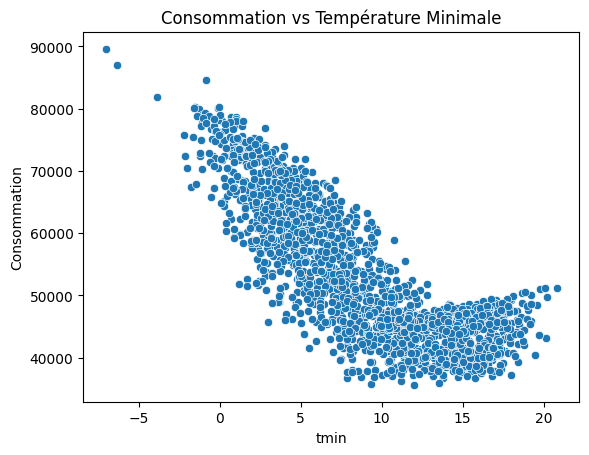

In [99]:
# Visualiser la relation entre la température et la consommation
sns.scatterplot(x='tmin', y='Consommation', data=df)
plt.title('Consommation vs Température Minimale')
plt.show()

C:\Users\Ndiassé Mbéguéré\AppData\Local\Temp\ipykernel_38528\1499952079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='saison', y='Consommation', palette='coolwarm')


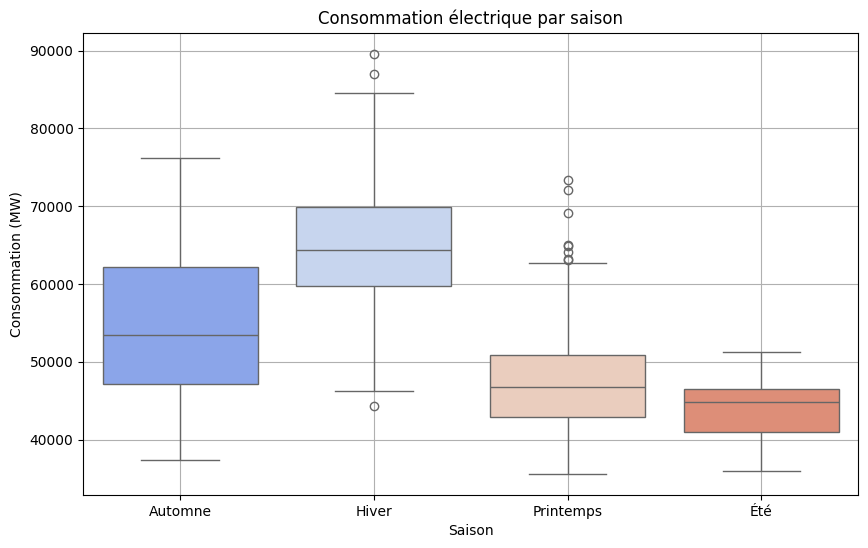

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assure-toi que la colonne 'saison' est de type catégorie
df['saison'] = df['saison'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='saison', y='Consommation', palette='coolwarm')
plt.title("Consommation électrique par saison")
plt.ylabel("Consommation (MW)")
plt.xlabel("Saison")
plt.grid(True)
plt.show()

C:\Users\Ndiassé Mbéguéré\AppData\Local\Temp\ipykernel_38528\2932073719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='tmin_bin', y='Consommation', palette='viridis')


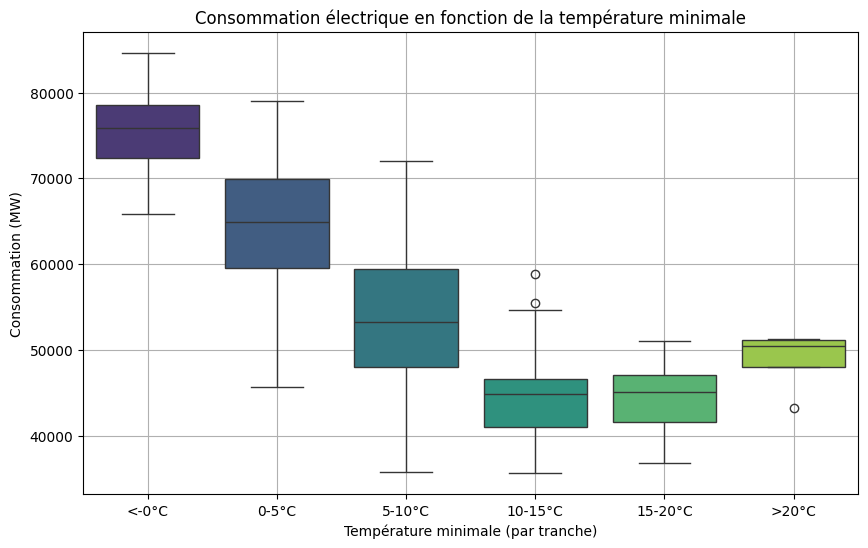

In [101]:
# Créer des tranches de températures minimales
bins = [-5, 0, 5, 10, 15, 20, 25]
labels = ['<-0°C', '0-5°C', '5-10°C', '10-15°C', '15-20°C', '>20°C']
df['tmin_bin'] = pd.cut(df['tmin'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tmin_bin', y='Consommation', palette='viridis')
plt.title("Consommation électrique en fonction de la température minimale")
plt.xlabel("Température minimale (par tranche)")
plt.ylabel("Consommation (MW)")
plt.grid(True)
plt.show()

C:\Users\Ndiassé Mbéguéré\AppData\Local\Temp\ipykernel_38528\1358472180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type de jour TEMPO', y='Consommation', palette='Set2')


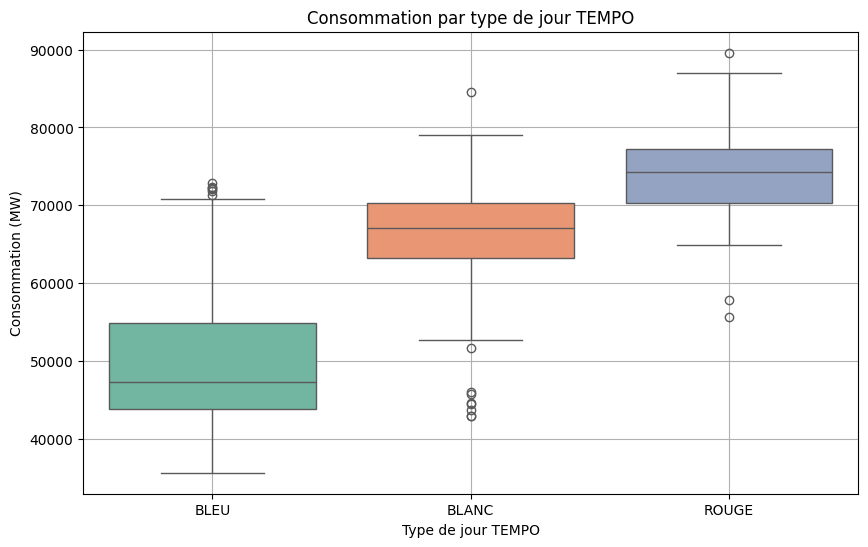

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type de jour TEMPO', y='Consommation', palette='Set2')
plt.title("Consommation par type de jour TEMPO")
plt.xlabel("Type de jour TEMPO")
plt.ylabel("Consommation (MW)")
plt.grid(True)
plt.show()

C:\Users\Ndiassé Mbéguéré\AppData\Local\Temp\ipykernel_38528\3173732028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='jour_ferie', y='Consommation', palette='Set1')


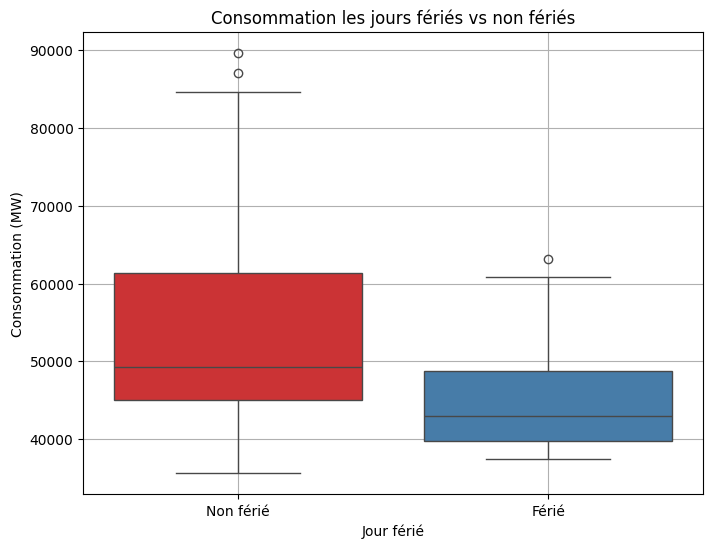

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='jour_ferie', y='Consommation', palette='Set1')
plt.title("Consommation les jours fériés vs non fériés")
plt.xlabel("Jour férié")
plt.ylabel("Consommation (MW)")
plt.grid(True)
plt.xticks([0, 1], ['Non férié', 'Férié'])
plt.show()

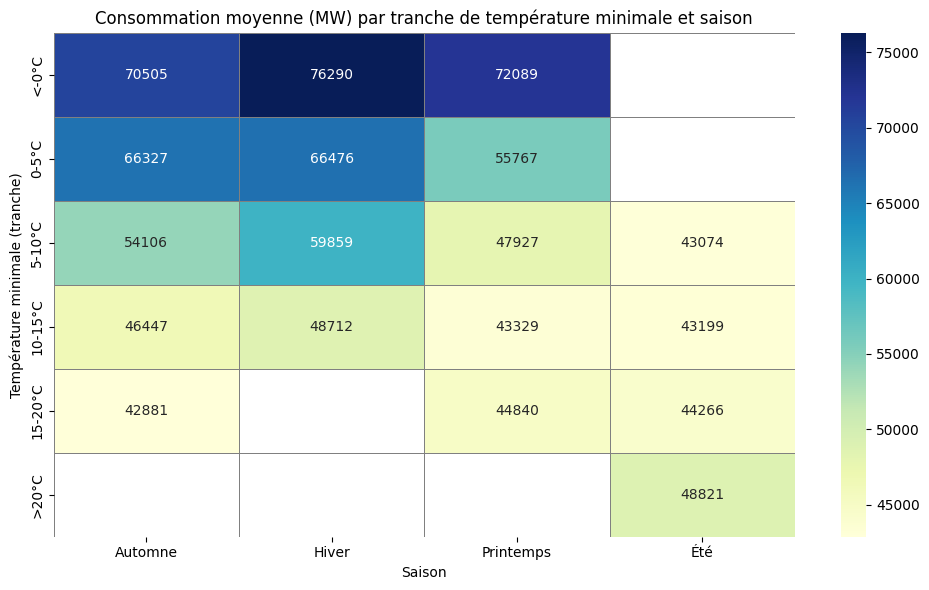

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper les températures minimales en tranches
bins = [-5, 0, 5, 10, 15, 20, 25]
labels = ['<-0°C', '0-5°C', '5-10°C', '10-15°C', '15-20°C', '>20°C']
df['tmin_bin'] = pd.cut(df['tmin'], bins=bins, labels=labels)

# Créer une table de pivot : moyenne de consommation selon saison et tmin_bin
pivot_table = df.pivot_table(values='Consommation', index='tmin_bin', columns='saison', aggfunc='mean')

# Afficher la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title("Consommation moyenne (MW) par tranche de température minimale et saison")
plt.xlabel("Saison")
plt.ylabel("Température minimale (tranche)")
plt.tight_layout()
plt.show()

MODELE REGRESSION LINEAIRE

In [106]:
# Séparer les features (X) et la cible (y)
X = df.drop(columns=['Date', 'Consommation'])
y = df['Consommation']

# Diviser le dataset en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
print(X_train.isnull().sum())

tmin                        0
tmax                        0
weekend                     0
jour_ferie                  0
saison                      0
Type de jour TEMPO          0
Year                        0
Month                       0
Day                         0
Weekday                     0
saison_Hiver                0
saison_Printemps            0
saison_Été                  0
Type de jour TEMPO_BLEU     0
Type de jour TEMPO_ROUGE    0
tmin_bin                    2
dtype: int64


In [110]:
# Supprimer les lignes avec des valeurs nulles dans X et y
X = X.dropna()
y = y[X.index]  # S'assurer que y a les mêmes indices que X

# Vérifier qu'il n'y a plus de valeurs nulles
print(X.isnull().sum())
print(y.isnull().sum())

tmin                        0
tmax                        0
weekend                     0
jour_ferie                  0
saison                      0
Type de jour TEMPO          0
Year                        0
Month                       0
Day                         0
Weekday                     0
saison_Hiver                0
saison_Printemps            0
saison_Été                  0
Type de jour TEMPO_BLEU     0
Type de jour TEMPO_ROUGE    0
tmin_bin                    0
dtype: int64
0


In [114]:
print(X_train.isnull().sum())

tmin                        0
tmax                        0
weekend                     0
jour_ferie                  0
saison                      0
Type de jour TEMPO          0
Year                        0
Month                       0
Day                         0
Weekday                     0
saison_Hiver                0
saison_Printemps            0
saison_Été                  0
Type de jour TEMPO_BLEU     0
Type de jour TEMPO_ROUGE    0
tmin_bin                    0
dtype: int64


In [113]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Recalibrer y_train

In [121]:
print("X_train NaNs:", X_train.isnull().sum().sum())
print("y_train NaNs:", y_train.isnull().sum())


X_train NaNs: 0
y_train NaNs: 0


In [116]:
X_test = X_test.fillna(X_test.mean(numeric_only=True))

In [118]:
print("X_test NaNs:", X_test.isnull().sum().sum())

X_test NaNs: 0


In [123]:
print(X_train.dtypes)

tmin                        float64
tmax                        float64
weekend                       int32
jour_ferie                    int32
Year                          int32
Month                         int32
Day                           int32
Weekday                       int32
saison_Hiver                float64
saison_Printemps            float64
saison_Été                  float64
Type de jour TEMPO_BLEU     float64
Type de jour TEMPO_ROUGE    float64
dtype: object


In [122]:
X_train = X_train.drop(columns=['saison', 'Type de jour TEMPO', 'tmin_bin'])
X_test = X_test.drop(columns=['saison', 'Type de jour TEMPO', 'tmin_bin'])

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser et entraîner le modèle
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prédictions
y_pred_lr = lr_model.predict(X_test)

# Évaluation
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"RMSE Régression Linéaire : {rmse_lr}")
print(f"R² Régression Linéaire : {r2_lr}")

RMSE Régression Linéaire : 3802.5040098175873
R² Régression Linéaire : 0.8738417173918182


C:\Users\Ndiassé Mbéguéré\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


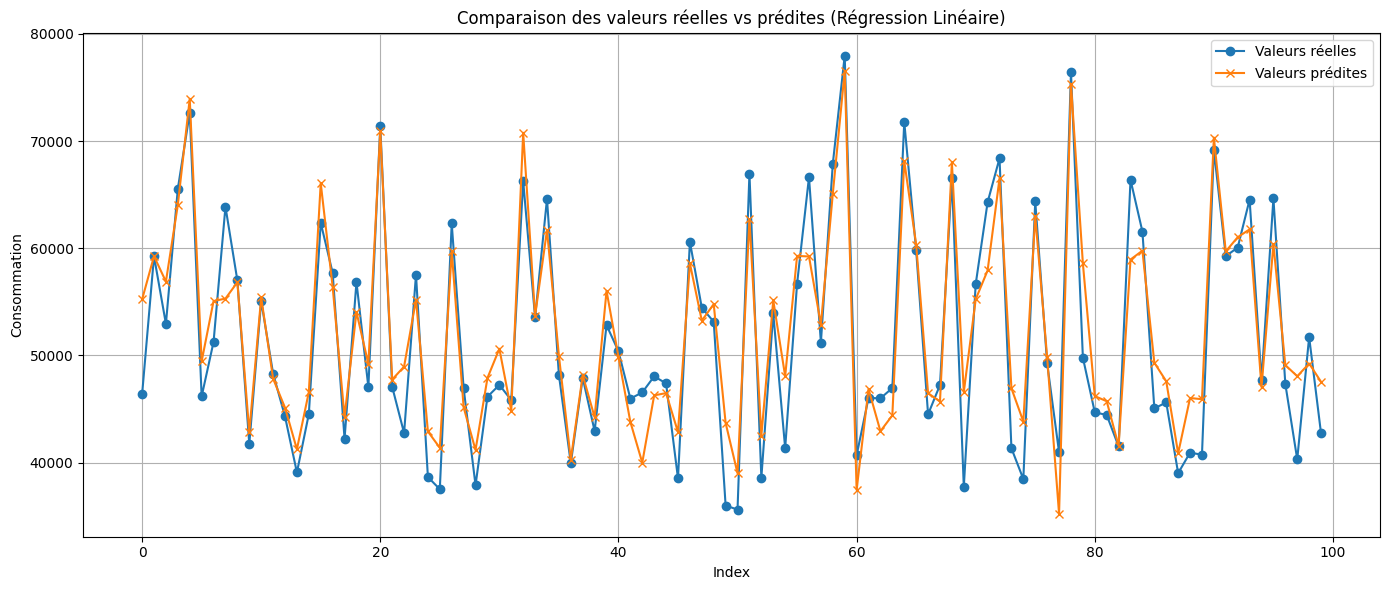

In [126]:
import matplotlib.pyplot as plt

# Comparaison sur les 100 premiers points du jeu de test
n = 100
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:n], label='Valeurs réelles', marker='o')
plt.plot(y_pred_lr[:n], label='Valeurs prédites', marker='x')
plt.title("Comparaison des valeurs réelles vs prédites (Régression Linéaire)")
plt.xlabel("Index")
plt.ylabel("Consommation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

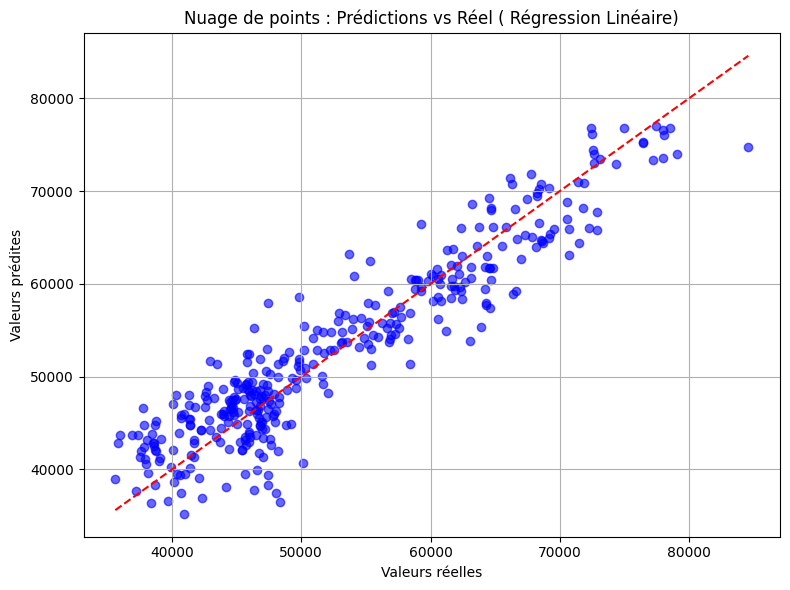

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne diagonale parfaite
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Nuage de points : Prédictions vs Réel (Régression Linéaire)")
plt.grid(True)
plt.tight_layout()
plt.show()

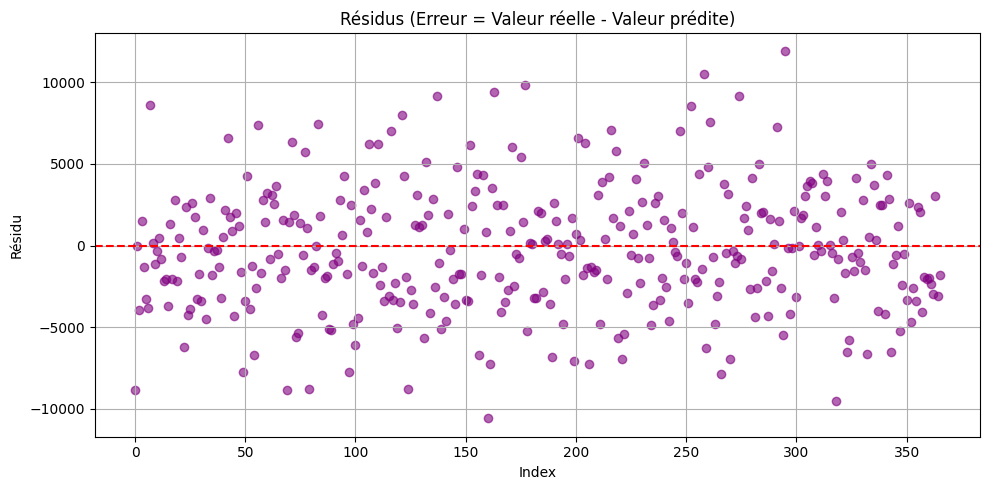

In [131]:
residus = y_test - y_pred_lr

plt.figure(figsize=(10, 5))
plt.scatter(range(len(residus)), residus, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus (Erreur = Valeur réelle - Valeur prédite)")
plt.xlabel("Index")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()

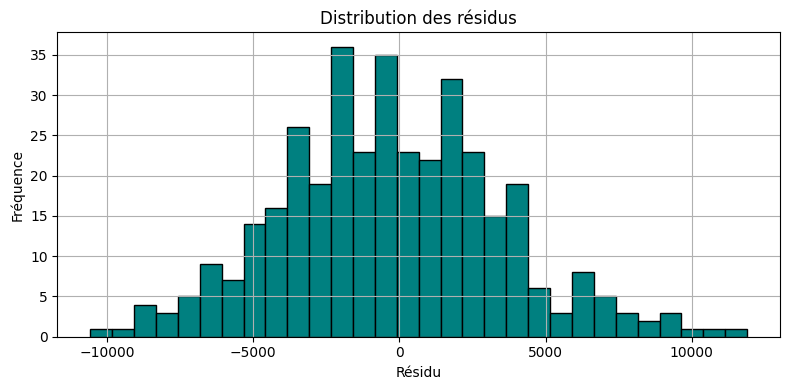

In [132]:
plt.figure(figsize=(8, 4))
plt.hist(residus, bins=30, color='teal', edgecolor='black')
plt.title("Distribution des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


MODELE XG BOOST

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [3]:
# Chargement du dataset (si ce n'est pas déjà fait)
df = pd.read_csv("eco2mix/eco2mix_final.csv")

In [4]:
df

,Date,Consommation,tmin,tmax,weekend,jour_ferie,saison,Type de jour TEMPO
0,2018-01-01,56302.041667,6.501796,11.188690,False,True,Hiver,BLEU
1,2018-01-02,63102.958333,6.229518,12.299398,False,False,Hiver,BLEU
2,2018-01-03,63761.270833,8.244848,14.868485,False,False,Hiver,BLEU
3,2018-01-04,63169.187500,9.100599,14.828743,False,False,Hiver,BLEU
4,2018-01-05,62318.708333,7.344311,13.331548,False,False,Hiver,BLEU
...,...,...,...,...,...,...,...,...
1821,2022-12-27,53530.250000,4.962500,11.850000,False,False,Hiver,BLEU
1822,2022-12-28,53856.000000,6.247596,13.032212,False,False,Hiver,BLEU
1823,2022-12-29,52290.770833,7.478846,12.827404,False,False,Hiver,BLEU
1824,2022-12-30,52326.729167,7.039904,14.597596,False,False,Hiver,BLEU


In [5]:
# Convertir la date en datetime + features temporelles utiles
df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["dayofweek"] = df["Date"].dt.dayofweek

In [7]:
# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=["saison", "Type de jour TEMPO"], drop_first=True)

In [8]:
df

,Date,Consommation,tmin,tmax,weekend,jour_ferie,month,day,dayofweek,saison_Hiver,saison_Printemps,saison_Été,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
0,2018-01-01,56302.041667,6.501796,11.188690,False,True,1,1,0,True,False,False,True,False
1,2018-01-02,63102.958333,6.229518,12.299398,False,False,1,2,1,True,False,False,True,False
2,2018-01-03,63761.270833,8.244848,14.868485,False,False,1,3,2,True,False,False,True,False
3,2018-01-04,63169.187500,9.100599,14.828743,False,False,1,4,3,True,False,False,True,False
4,2018-01-05,62318.708333,7.344311,13.331548,False,False,1,5,4,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-12-27,53530.250000,4.962500,11.850000,False,False,12,27,1,True,False,False,True,False
1822,2022-12-28,53856.000000,6.247596,13.032212,False,False,12,28,2,True,False,False,True,False
1823,2022-12-29,52290.770833,7.478846,12.827404,False,False,12,29,3,True,False,False,True,False
1824,2022-12-30,52326.729167,7.039904,14.597596,False,False,12,30,4,True,False,False,True,False


In [9]:
# Définir les features et la cible
X = df.drop(columns=["Date", "Consommation"])
y = df["Consommation"]

In [10]:
X

,tmin,tmax,weekend,jour_ferie,month,day,dayofweek,saison_Hiver,saison_Printemps,saison_Été,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
0,6.501796,11.188690,False,True,1,1,0,True,False,False,True,False
1,6.229518,12.299398,False,False,1,2,1,True,False,False,True,False
2,8.244848,14.868485,False,False,1,3,2,True,False,False,True,False
3,9.100599,14.828743,False,False,1,4,3,True,False,False,True,False
4,7.344311,13.331548,False,False,1,5,4,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,4.962500,11.850000,False,False,12,27,1,True,False,False,True,False
1822,6.247596,13.032212,False,False,12,28,2,True,False,False,True,False
1823,7.478846,12.827404,False,False,12,29,3,True,False,False,True,False
1824,7.039904,14.597596,False,False,12,30,4,True,False,False,True,False


In [11]:
y

0       56302.041667
1       63102.958333
2       63761.270833
3       63169.187500
4       62318.708333
            ...     
1821    53530.250000
1822    53856.000000
1823    52290.770833
1824    52326.729167
1825    46224.208333
Name: Consommation, Length: 1826, dtype: float64

In [37]:
# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,tmin,tmax,weekend,jour_ferie,month,day,dayofweek,saison_Hiver,saison_Printemps,saison_Été,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
439,7.896532,16.482081,True,False,3,16,5,True,False,False,True,False
544,18.503911,32.990608,True,False,6,29,5,False,False,True,True,False
182,17.756213,28.200000,False,False,7,2,0,False,False,True,True,False
170,15.639645,28.518452,False,False,6,20,2,False,True,False,True,False
292,9.702247,19.881564,True,False,10,20,5,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,5.747826,12.647826,False,False,2,4,3,True,False,False,False,False
1294,16.585024,28.196135,True,False,7,18,6,False,False,True,True,False
860,11.174302,20.170556,True,False,5,10,6,False,True,False,True,False
1459,9.745411,15.991304,False,False,12,30,3,True,False,False,True,False


In [39]:
X_test

,tmin,tmax,weekend,jour_ferie,month,day,dayofweek,saison_Hiver,saison_Printemps,saison_Été,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
998,8.706557,15.919565,False,False,9,25,4,False,False,False,True,False
1518,0.893720,12.306763,True,False,2,27,6,True,False,False,True,False
298,7.873596,15.384270,False,False,10,26,4,False,False,False,True,False
415,1.949724,14.215000,False,False,2,20,2,True,False,False,True,False
1120,1.535749,7.163768,False,False,1,25,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
637,13.719672,21.871038,False,False,9,30,0,False,False,False,True,False
1611,11.001923,21.817788,False,False,5,31,1,False,True,False,False,False
607,16.135519,28.830601,True,False,8,31,5,False,False,True,True,False
994,12.729121,24.059116,False,False,9,21,0,False,False,False,True,False


In [40]:
y_train

439     53494.062500
544     45184.875000
182     47835.145833
170     48333.875000
292     43668.270833
            ...     
1130    62763.812500
1294    38913.854167
860     36296.291667
1459    52834.520833
1126    56977.937500
Name: Consommation, Length: 1460, dtype: float64

In [41]:
y_test

998     46359.020833
1518    59249.416667
298     52943.895833
415     65548.250000
1120    72636.958333
            ...     
637     46229.312500
1611    45773.979167
607     42103.812500
994     44417.687500
1228    44004.333333
Name: Consommation, Length: 366, dtype: float64

In [17]:
# Modèle XGBoost
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# Prédictions
y_pred = xgb_model.predict(X_test)

In [19]:
# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE XGBoost : {rmse}")
print(f"R² XGBoost : {r2}")

RMSE XGBoost : 2288.8538861428606
R² XGBoost : 0.9542898605921701


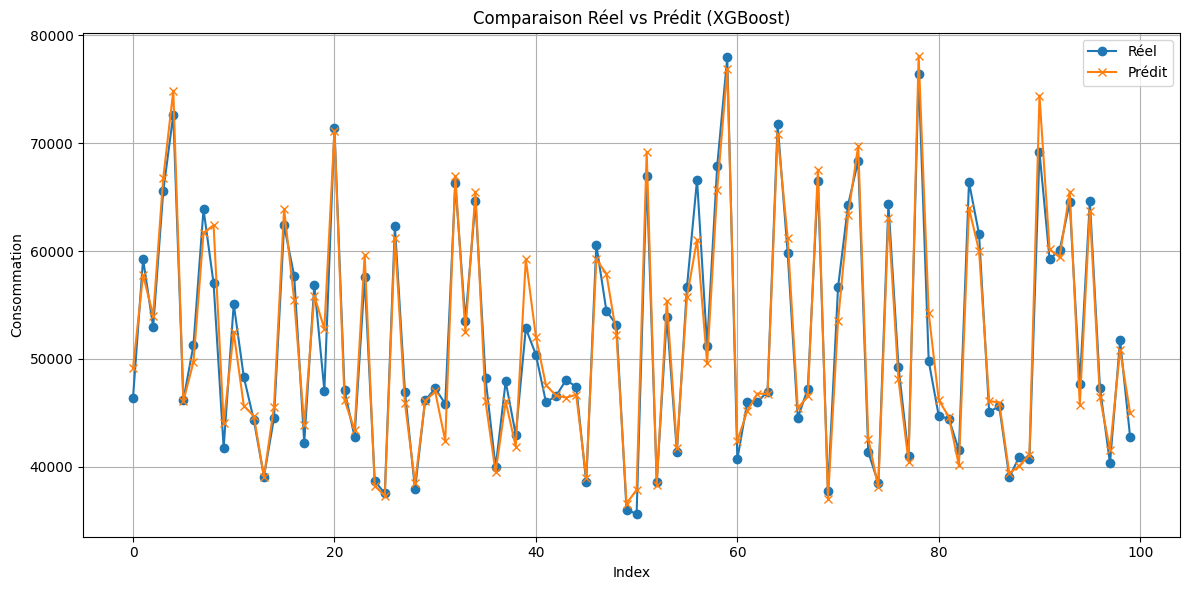

In [20]:
# Visualisation : prédictions vs réels
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Réel", marker='o')
plt.plot(y_pred[:100], label="Prédit", marker='x')
plt.title("Comparaison Réel vs Prédit (XGBoost)")
plt.xlabel("Index")
plt.ylabel("Consommation")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
import joblib

# Sauvegarde
joblib.dump(xgb_model, "xgboost_model.pkl")

# Chargement plus tard
# xgb_model = joblib.load("xgboost_model.pkl")

['xgboost_model.pkl']

MODELE ARIMA

In [22]:
import pandas as pd

# S'assurer que 'Date' est en datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Série univariée pour ARIMA
ts = df['Consommation']

In [23]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ----------- ---------------------------- 174.1/614.7 kB 3.6 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/614.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/2.8 MB 24.1 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 13.3 MB/s eta 0:00:01
   --------------- ------------------------ 1.1/2.8 MB 8.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.8 MB 6.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 5.9 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 4.8 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 4.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.4/2.8 MB 4.0 MB/s eta 0:00:01
   -------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Split : train/test
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# ARIMA automatique
model_arima = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27806.742, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28101.502, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28073.016, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28029.908, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28099.503, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27805.462, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27822.751, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27933.391, Time=0.86 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27807.168, Time=0.75 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27810.684, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27808.758, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=27803.080, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=27820.688, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]  

In [25]:
# Entraînement sur le train
model_arima.fit(train)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
# Prédictions
forecast_arima = model_arima.predict(n_periods=len(test))

In [27]:
# Évaluation
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
print(f"RMSE ARIMA : {rmse_arima}")

RMSE ARIMA : 12380.925623013569


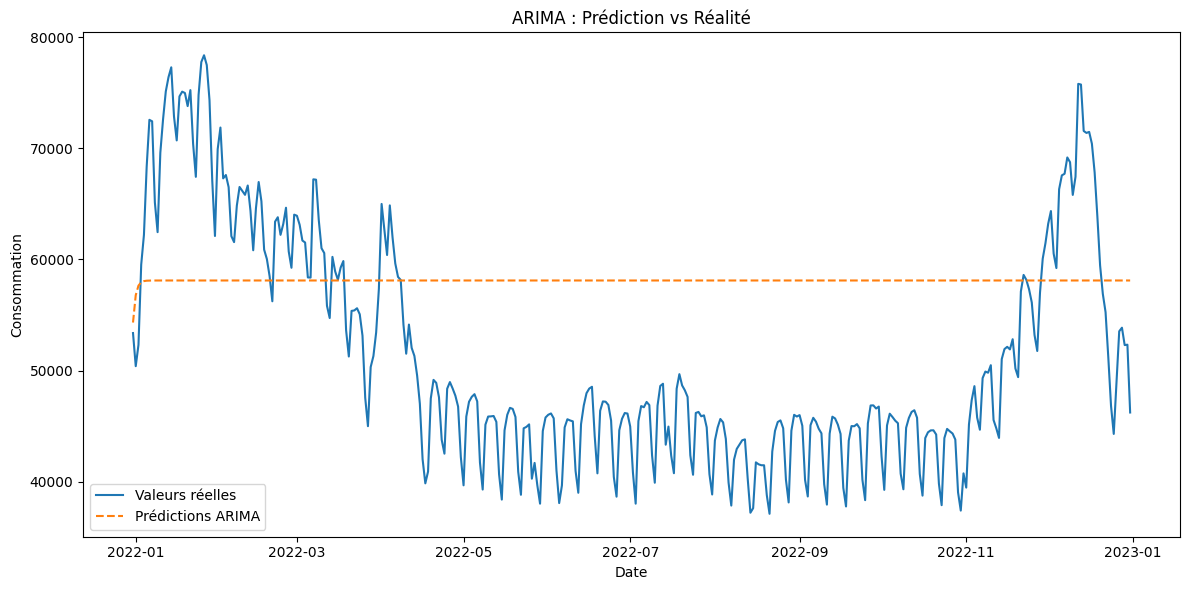

In [28]:
# Graphique
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Valeurs réelles')
plt.plot(test.index, forecast_arima, label='Prédictions ARIMA', linestyle='--')
plt.title('ARIMA : Prédiction vs Réalité')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.legend()
plt.tight_layout()
plt.show()

MODELE SARIMA

In [32]:
# SARIMA optimisé avec moins de combinaisons testées
model = auto_arima(
    train,
    seasonal=True,
    m=7,  # saisonnalité hebdomadaire
    start_p=0, max_p=2,
    start_q=0, max_q=2,
    start_P=0, max_P=1,
    start_Q=0, max_Q=1,
    d=1, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,  # Active le mode rapide
    n_jobs=-1  # Utilise tous les cœurs du CPU si possible
)

C:\Users\Ndiassé Mbéguéré\miniconda3\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=26888.763, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=26561.644, Time=1.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=3.32 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=26815.452, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=26630.891, Time=0.35 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=26582.125, Time=0.73 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=26581.986, Time=0.89 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=26556.045, Time=1.26 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=26811.565, Time=0.23 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,2)(1,1,0)[7]             : AIC=26557.802, Time=2.26 sec
 ARIMA(1,1,2)(1,1,0)[7]             : AIC=inf, Time=3.61 sec
 ARIMA(0,1,1)(1,1,0)[7] intercept   : AIC=26557.9

In [33]:
# Prédictions
forecast = model.predict(n_periods=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)

print(f"✅ RMSE SARIMA optimisé : {rmse}")
print(f"✅ R² SARIMA optimisé : {r2}")

✅ RMSE SARIMA optimisé : 384743.480837488
✅ R² SARIMA optimisé : -1365.2074264848848


XG BOOST Fine tuné

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Définir les hyperparamètres à tester
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

In [43]:
# Initialiser le modèle
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

In [44]:
# Initialiser le RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,  # nombre d'itérations = nombre de combinaisons testées
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [45]:
# Entraînement
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.1, 0.5, 1, 2],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [46]:
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", random_search.best_params_)

Meilleurs hyperparamètres : {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [47]:
# Prédictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [48]:
# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [53]:
print("✅ RMSE XGBoost Tuné :", rmse)
print("✅ R² XGBoost Tuné :", r2)

✅ RMSE XGBoost Tuné : 2220.0429014031447
✅ R² XGBoost Tuné : 0.9569969616836206
